In [997]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import yellowbrick as yb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as cr
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification

from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import ClassificationReport

In [998]:
#Read the dataset
data=pd.read_csv('covid_database.csv')

#Display the first five rows
print(data.head())

   ID  age_group  Sex  Fever  Cough  Resp_dist  Sore_throat  Chest_pain  \
0   1          1    1      1      0          0            1           1   
1   2          1    1      1      0          0            0           0   
2   3          1    1      1      0          0            0           0   
3   4          1    0      1      1          0            1           1   
4   5          1    0      1      1          1            1           0   

   Headache  Diarrhea  ...  Cancer  Kidney_problems  Fear_of_reinfection  \
0         1         0  ...       0                0                    0   
1         0         0  ...       0                0                    0   
2         0         0  ...       0                0                    0   
3         1         0  ...       0                0                    0   
4         1         0  ...       0                0                    0   

   Hozpitalization  Self_medication  Persistent_symptoms  Depression  \
0                0  

In [999]:
data.groupby('Persistent_symptoms').count()

,ID,age_group,Sex,Fever,Cough,Resp_dist,Sore_throat,Chest_pain,Headache,Diarrhea,...,Heart_disease,Cancer,Kidney_problems,Fear_of_reinfection,Hozpitalization,Self_medication,Depression,Sputum_production,Lack_of_appetite,Fatigue
Persistent_symptoms,,,,,,,,,,,,,,,,,,,,,
0,802,802,802,802,802,802,802,802,802,802,...,802,802,802,802,802,802,802,802,802,802
1,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200


In [1000]:
#Check for null values
print(data.isnull().sum())

ID                     0
age_group              0
Sex                    0
Fever                  0
Cough                  0
Resp_dist              0
Sore_throat            0
Chest_pain             0
Headache               0
Diarrhea               0
Dyspnea                0
Myalgia                0
Sleep_disturbance      0
Smoking_habits         0
Physical_exercise      0
Diabetes               0
Hypertension           0
Heart_disease          0
Cancer                 0
Kidney_problems        0
Fear_of_reinfection    0
Hozpitalization        0
Self_medication        0
Persistent_symptoms    0
Depression             0
Sputum_production      0
Lack_of_appetite       0
Fatigue                0
dtype: int64


In [1001]:
#Check data types
data.dtypes

ID                     int64
age_group              int64
Sex                    int64
Fever                  int64
Cough                  int64
Resp_dist              int64
Sore_throat            int64
Chest_pain             int64
Headache               int64
Diarrhea               int64
Dyspnea                int64
Myalgia                int64
Sleep_disturbance      int64
Smoking_habits         int64
Physical_exercise      int64
Diabetes               int64
Hypertension           int64
Heart_disease          int64
Cancer                 int64
Kidney_problems        int64
Fear_of_reinfection    int64
Hozpitalization        int64
Self_medication        int64
Persistent_symptoms    int64
Depression             int64
Sputum_production      int64
Lack_of_appetite       int64
Fatigue                int64
dtype: object

In [1002]:
#Divide the dataset into independent and dependent variables
X = data.drop(["Persistent_symptoms"], axis=1)
y = data['Persistent_symptoms']

#y = y.values.ravel()
#Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True) 

#Data was splitted as 80% train data and 20% test data.
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
#y_train = y_train.values.reshape(-1,1)
#y_test = y_test.values.reshape(-1,1)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (801, 27)
X_test shape: (201, 27)
y_train shape: (801,)
y_test shape: (201,)


In [1003]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [1004]:
#To store results of models, we create two dictionaries
result_dict_train = {}
result_dict_test = {}

LogisticRegression

In [1005]:
reg = LogisticRegression(random_state = 42)
accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))

Train Score: 0.8439673913043478
Test Score: 0.835820895522388


In [1006]:

#Store results in the dictionaries
result_dict_train["Logistic Regression Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Regression Test Score"] = reg.score(X_test,y_test)

[[154   5]
 [ 28  14]]


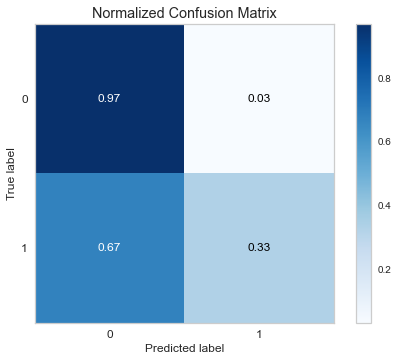

In [1007]:
#confusion matrix of LogisticRegression Accuracy
cm_logistic_reg = confusion_matrix(y_test,y_pred)
print(cm_logistic_reg)

#confusion matrix plot of LogisticRegression
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       159
           1       0.74      0.33      0.46        42

    accuracy                           0.84       201
   macro avg       0.79      0.65      0.68       201
weighted avg       0.82      0.84      0.81       201



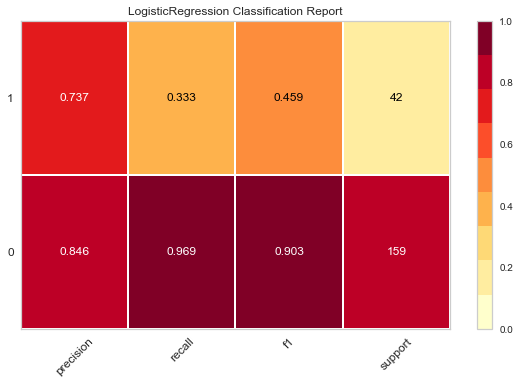

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [1008]:
#classification_report of LogisticRegression
print(cr(y_test, y_pred))

viz = ClassificationReport(LogisticRegression(random_state = 42), support=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

KNeighborsClassifier

In [1009]:
#KNN
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(X_test,y_test))

Train Score: 0.8514596273291926
Test Score: 0.845771144278607


In [1010]:
#Store results in the dictionaries
result_dict_train["KNN Train Score"] = np.mean(accuracies)
result_dict_test["KNN Test Score"] = knn.score(X_test,y_test)


[[154   5]
 [ 26  16]]


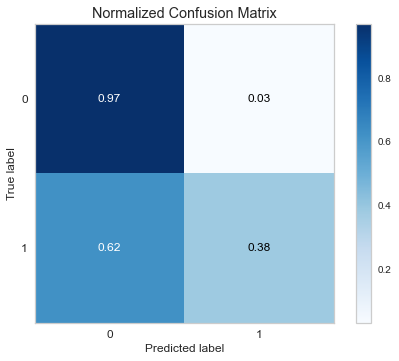

In [1011]:
#confusion matrix of KNN Accuracy
cm_knn = confusion_matrix(y_test,y_pred)
print(cm_knn)

#confusion matrix plot of KNN
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       159
           1       0.76      0.38      0.51        42

    accuracy                           0.85       201
   macro avg       0.81      0.67      0.71       201
weighted avg       0.84      0.85      0.82       201



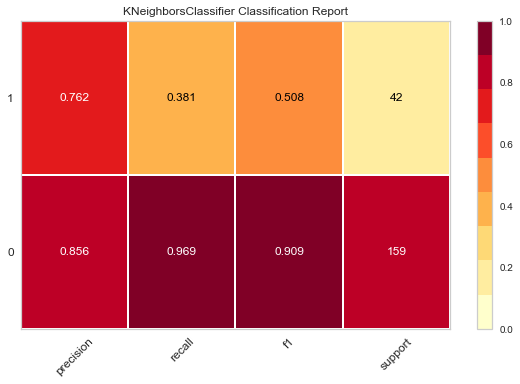

<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [1012]:
#classification_report of KNN
print(cr(y_test, y_pred))

viz = ClassificationReport(KNeighborsClassifier(), support=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

SVC

In [1013]:
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.862694099378882
Test Score: 0.8606965174129353


In [1014]:
#Store results in the dictionaries
result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = svc.score(X_test,y_test)

[[159   0]
 [ 28  14]]


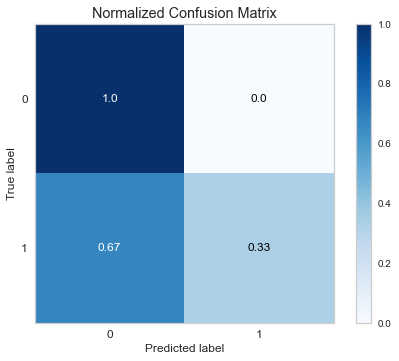

In [1015]:
#confusion matrix of SVM Accuracy
cm_svm = confusion_matrix(y_test,y_pred)
print(cm_svm)

#confusion matrix plot of SVM
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       159
           1       1.00      0.33      0.50        42

    accuracy                           0.86       201
   macro avg       0.93      0.67      0.71       201
weighted avg       0.88      0.86      0.83       201



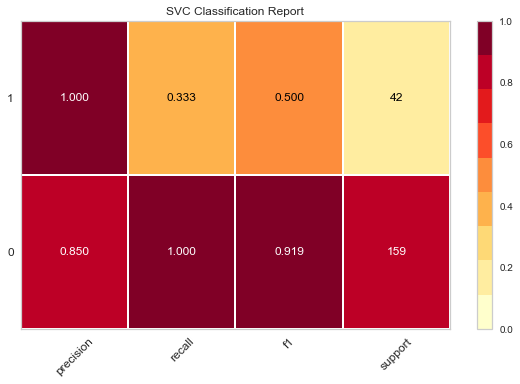

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [1016]:
#classification_report of SVM
print(cr(y_test, y_pred))

viz = ClassificationReport(SVC(random_state = 42), support=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

Decision Tree Classifier

In [1017]:
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test,y_test))

Train Score: 0.7928027950310559
Test Score: 0.8258706467661692


In [1018]:
#Store results in the dictionaries
result_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Test Score"] = dtc.score(X_test,y_test)

[[146  13]
 [ 22  20]]


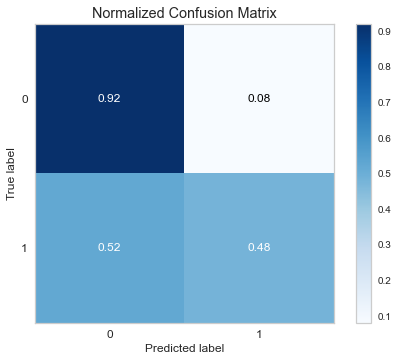

In [1019]:
#confusion matrix of Decision Tree Accuracy
cm_dt = confusion_matrix(y_test,y_pred)
print(cm_dt)

#confusion matrix plot of Decision Tree
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       159
           1       0.61      0.48      0.53        42

    accuracy                           0.83       201
   macro avg       0.74      0.70      0.71       201
weighted avg       0.81      0.83      0.82       201



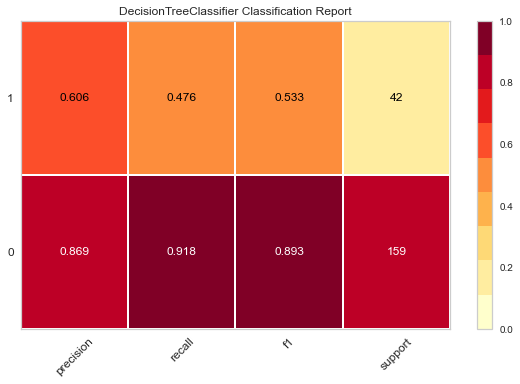

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [1020]:
#classification_report of Decision Tree
print(cr(y_test, y_pred))

viz = ClassificationReport(DecisionTreeClassifier(random_state = 42), support=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

RandomForestClassifier

In [1021]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(X_test,y_test))

Train Score: 0.8739285714285714
Test Score: 0.8656716417910447


In [1022]:
#Store results in the dictionaries
result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Test Score"] = rfc.score(X_test,y_test)

[[159   0]
 [ 27  15]]


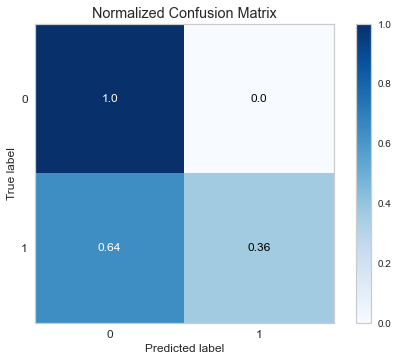

In [1023]:
#confusion matrix of Random Forest Tree Accuracy
cm_rf = confusion_matrix(y_test,y_pred)
print(cm_rf)

#confusion matrix plot of Random Forest Tree
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       159
           1       1.00      0.36      0.53        42

    accuracy                           0.87       201
   macro avg       0.93      0.68      0.72       201
weighted avg       0.89      0.87      0.84       201



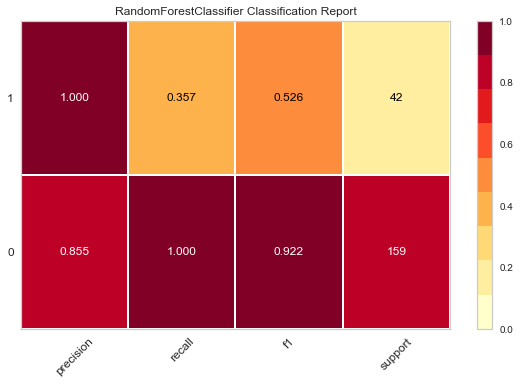

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [1024]:
#classification_report of Random Forest Tree
print(cr(y_test, y_pred))

viz = ClassificationReport(RandomForestClassifier(random_state = 42), support=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

GaussianNB

In [1025]:
gnb = GaussianNB()
accuracies = cross_val_score(gnb, X_train, y_train, cv=5)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",gnb.score(X_test,y_test))

Train Score: 0.79152950310559
Test Score: 0.7761194029850746


In [1026]:
#Store results in the dictionaries
result_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)
result_dict_test["Gaussian NB Test Score"] = gnb.score(X_test,y_test)

[[134  25]
 [ 20  22]]


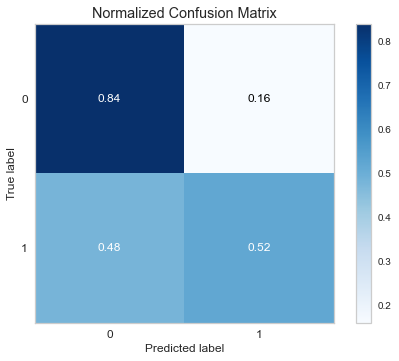

In [1027]:
#confusion matrix of GNB Accuracy
cm_gnb = confusion_matrix(y_test,y_pred)
print(cm_gnb)

#confusion matrix plot of GNB Tree
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       159
           1       0.47      0.52      0.49        42

    accuracy                           0.78       201
   macro avg       0.67      0.68      0.68       201
weighted avg       0.79      0.78      0.78       201



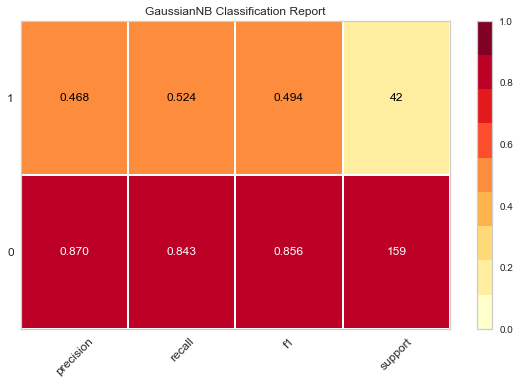

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [1028]:
#classification_report of GNB Tree
print(cr(y_test, y_pred))

viz = ClassificationReport(GaussianNB(), support=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

AdaBoost

In [1029]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)
accuracies = cross_val_score(abc, X_train, y_train, cv=5)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",abc.score(X_test,y_test))

Train Score: 0.8539518633540373
Test Score: 0.8606965174129353


In [1030]:
#Store results in the dictionaries
result_dict_train["AdaBoost Train Score"] = np.mean(accuracies)
result_dict_test["AdaBoost Test Score"] = abc.score(X_test,y_test)

[[158   1]
 [ 27  15]]


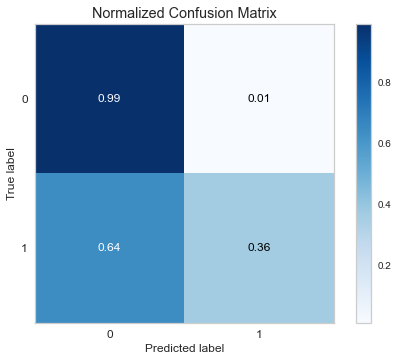

In [1031]:
#confusion matrix of AdaBoost Model Accuracy
cm_abc = confusion_matrix(y_test,y_pred)
print(cm_abc)

#confusion matrix plot of AdaBoost Model
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       159
           1       0.94      0.36      0.52        42

    accuracy                           0.86       201
   macro avg       0.90      0.68      0.72       201
weighted avg       0.87      0.86      0.83       201



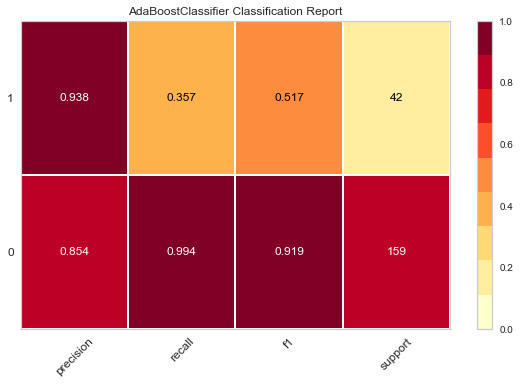

<AxesSubplot:title={'center':'AdaBoostClassifier Classification Report'}>

In [1032]:
#classification_report of AdaBoost Model
print(cr(y_test, y_pred))

viz = ClassificationReport(AdaBoostClassifier(n_estimators=50, learning_rate=0.1), support=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

Gradient Boosting Classification

In [1033]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()
gradient_booster.fit(X_train, y_train)
accuracies = cross_val_score(gradient_booster, X_train, y_train, cv=5)
y_pred = gradient_booster.predict(X_test)

#Obtain accuracy
print("Train Score:", np.mean(accuracies))
print("Test Score:", gradient_booster.score(X_test,y_test))

Train Score: 0.8502018633540371
Test Score: 0.8507462686567164


In [1034]:
#Store results in the dictionaries
result_dict_train["GradientBoost Train Score"] = np.mean(accuracies)
result_dict_test["GradientBoost Test Score"] = gradient_booster.score(X_test,y_test)

[[153   6]
 [ 24  18]]


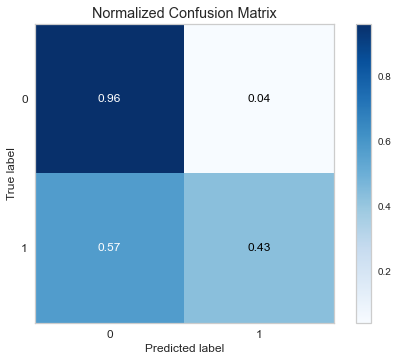

In [1035]:
#confusion matrix of GradientBoostingClassifier Accuracy
cm_gradient_booster = confusion_matrix(y_test,y_pred)
print(cm_gradient_booster)

#confusion matrix plot of GradientBoostingClassifier
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       159
           1       0.75      0.43      0.55        42

    accuracy                           0.85       201
   macro avg       0.81      0.70      0.73       201
weighted avg       0.84      0.85      0.83       201



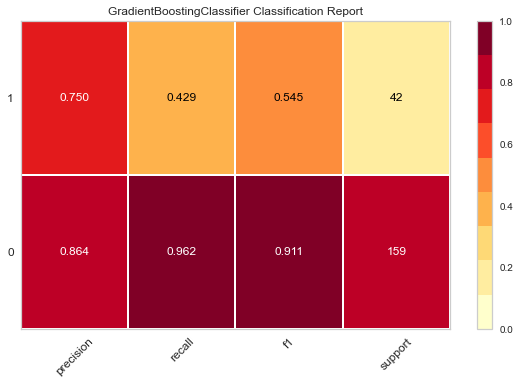

<AxesSubplot:title={'center':'GradientBoostingClassifier Classification Report'}>

In [1036]:
#classification_report of GradientBoostingClassifier
print(cr(y_test, y_pred))

viz = ClassificationReport(GradientBoostingClassifier(learning_rate=0.1), support=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

In [1037]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
print(df_result_train)

                                    Score
Logistic Regression Train Score  0.843967
KNN Train Score                  0.851460
SVM Train Score                  0.862694
Decision Tree Train Score        0.792803
Random Forest Train Score        0.873929
Gaussian NB Train Score          0.791530
AdaBoost Train Score             0.853952
GradientBoost Train Score        0.850202


In [1038]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
print(df_result_test)

                                   Score
Logistic Regression Test Score  0.835821
KNN Test Score                  0.845771
SVM Test Score                  0.860697
Decision Tree Test Score        0.825871
Random Forest Test Score        0.865672
Gaussian NB Test Score          0.776119
AdaBoost Test Score             0.860697
GradientBoost Test Score        0.850746


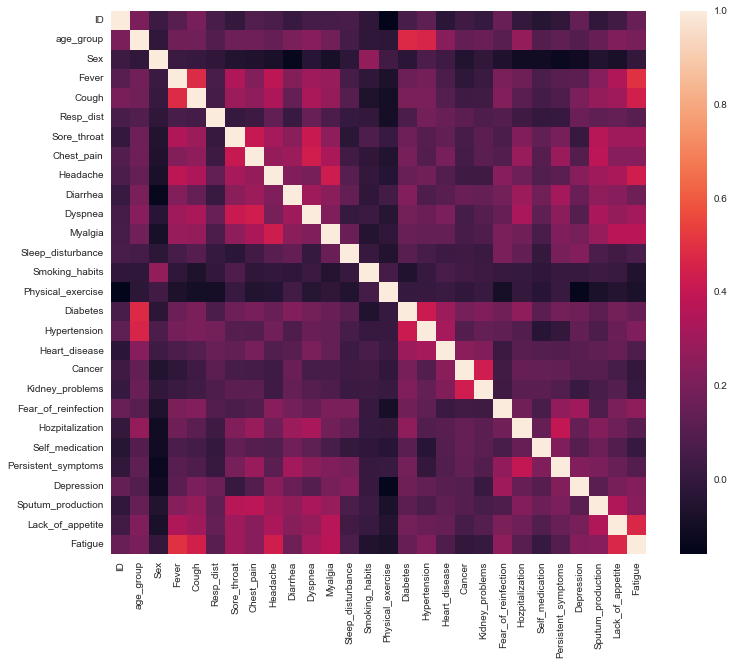

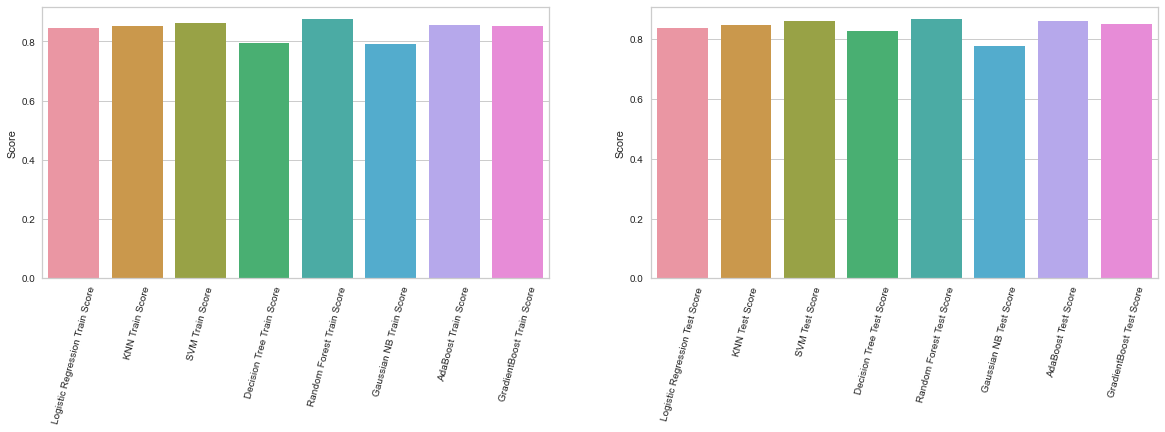

In [1039]:
import seaborn as sns

# checking correlation using heatmap
#Loading dataset
plt.figure(figsize=(12,10))
ax = sns.heatmap(data.corr())


fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_50648\3359521940.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax)


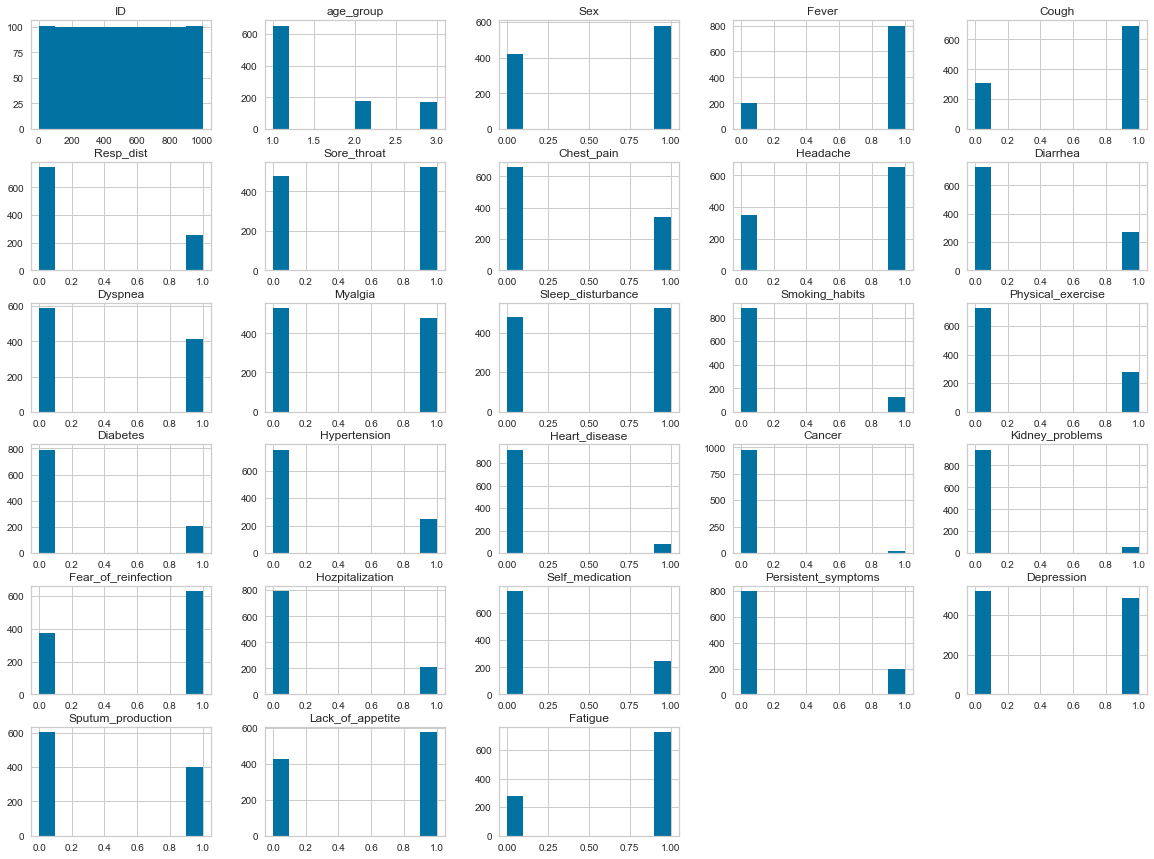

In [1040]:
#Display Plot 
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

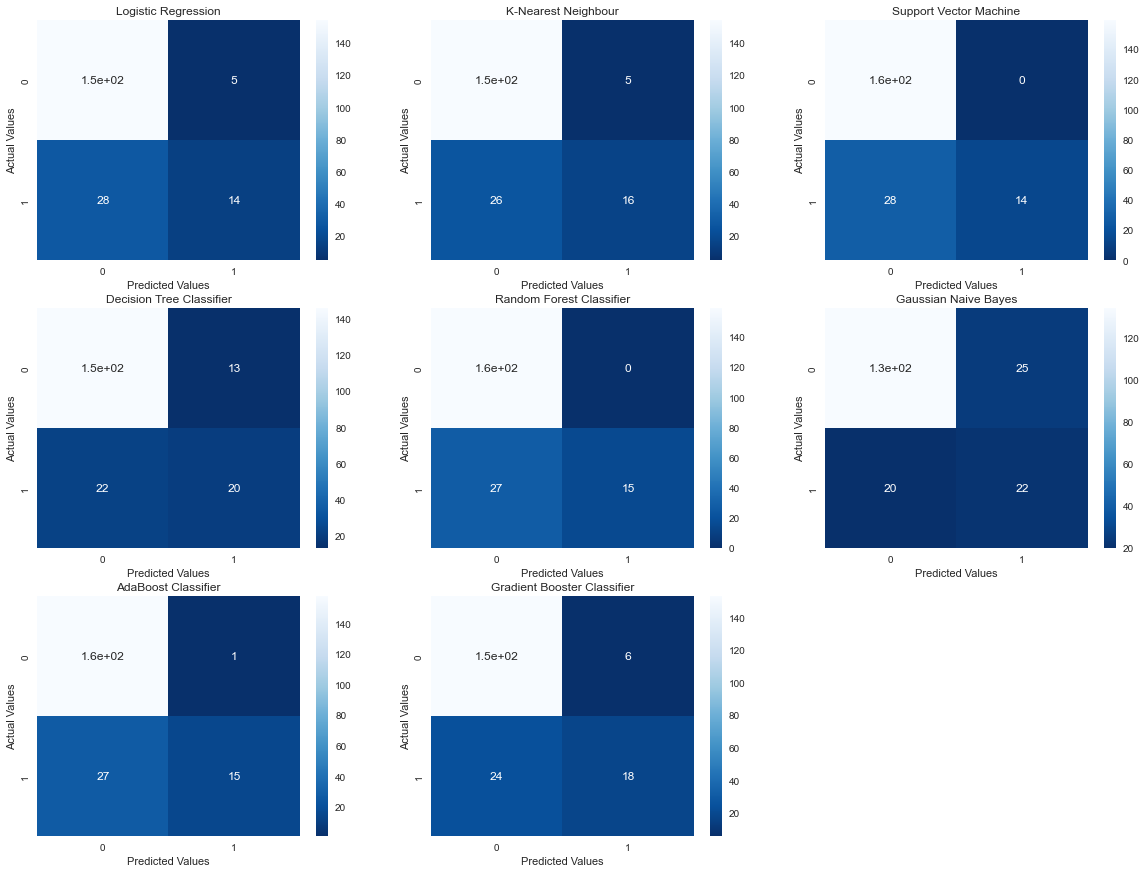

In [1041]:
fig = plt.figure(figsize=(20,15))
cm_list = [cm_logistic_reg, cm_knn, cm_svm, cm_dt, cm_rf, cm_gnb, cm_abc, cm_gradient_booster]
model_list = ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gaussian Naive Bayes', 'AdaBoost Classifier', 'Gradient Booster Classifier']
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(3, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap= 'Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')